## Price Predictor
This project predicts the prices of houses in Boston using the data collected from https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

The data has been slightly manipulated, so I can clean it up a bit. For the feature `RM`, some values were manually removed.

The goal of this project is to figure out how data can be visualized to see trends and what models should be used to calculate prices for houses using those trends.

We will start of by importing the data stored in `data.csv` using pandas. The data is stored in `housing` variable

In [535]:
import pandas as pd
housing = pd.read_csv("data.csv")

Ensure data values are in their proper place and all features and the target can be seen.

In [536]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Check for any missing data. We can see that all columns have 506 values except `RM` which has 501

In [537]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


We will take care or `RM` later, let's view the data values for each column as a histogram to see what we're working with. 

The data, for the most part, is very nice and we can work with it, however there is one important thing to keep in mind. I noticed that the feature `CHAS` can only have the value 1 or 0.

Let's look at what `CHAS` is and what we should do to make sure that `CHAS` is evenly distributed within our training and testing sets. 

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

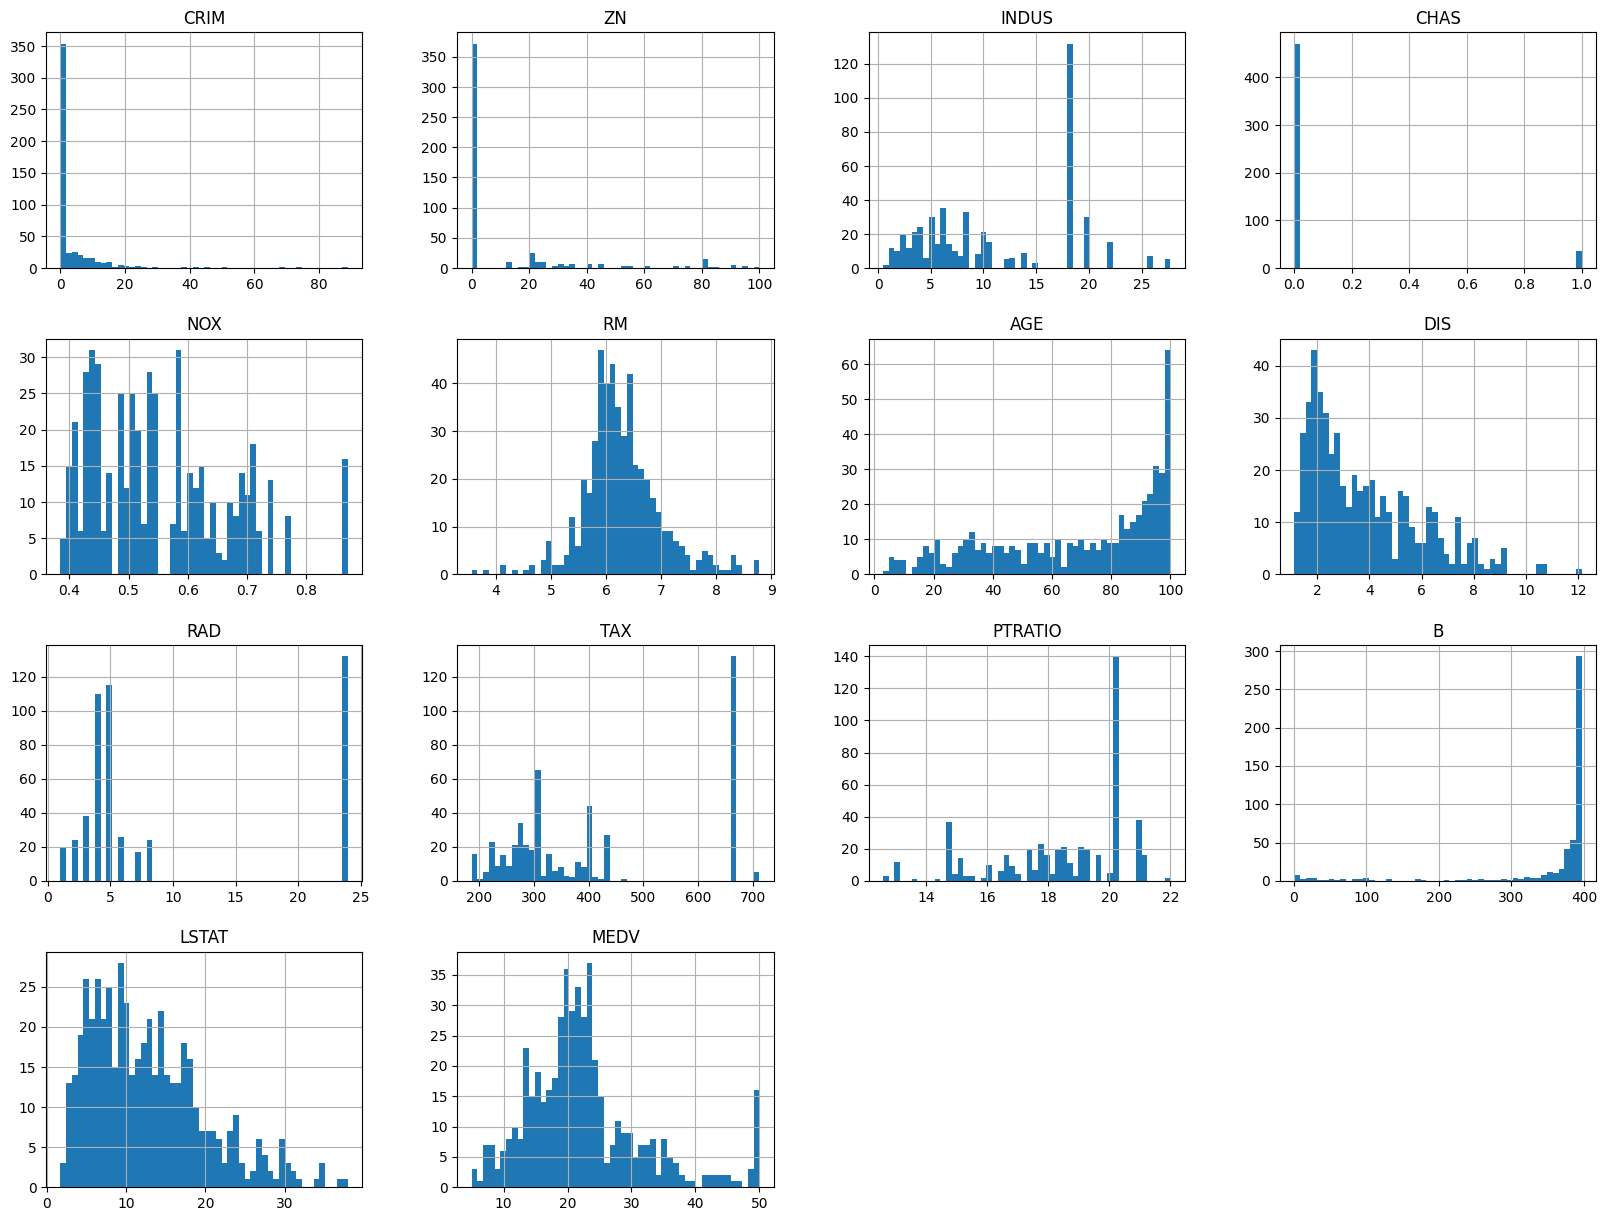

In [538]:
#Plotting histograms
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

Attached below is the attributes information for our data:

1. `CRIM`      per capita crime rate by town
2. `ZN`        proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS`     proportion of non-retail business acres per town
4. `CHAS`      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. `NOX`       nitric oxides concentration (parts per 10 million)
6. `RM`        average number of rooms per dwelling
7. `AGE`       proportion of owner-occupied units built prior to 1940
8. `DIS`       weighted distances to five Boston employment centres
9. `RAD`       index of accessibility to radial highways
10. `TAX`      full-value property-tax rate per $10,000
11. `PTRATIO`  pupil-teacher ratio by town
12. `B`        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. `LSTAT`    % lower status of the population
14. `MEDV`     Median value of owner-occupied homes in $1000's

We can see that `CHAS` is only meant to be either 1 or 0 per the attributes information. Let's look at the value counts for CHAS.

We can see that `CHAS` attribute in the data has the value *0* occurr **471** times and the value *1* only occurrs **35** times! This is also reflected in the histograms above

In [539]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## Looking for Correlations

Now that we have verified our data, we can look for correlations to see what attributes are stronlgy correlated with `MEDV` (prices). 
The attributes that are strongly correlated with `MEDV` wil have the most impact on determining its value

It is clear that the strongest correlation of `MEDV` (Prices) is with `RM` (Number of rooms). We can also see this in the scatterplots diplayed below.

In [540]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.697242
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='B', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='B'>,
        <Axes: xlabel='RM', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='ZN', ylabel='B'>,
        <Axes: xlabel='LSTAT', ylabel='B'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='B', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='B', ylabel='LSTAT'>,
       

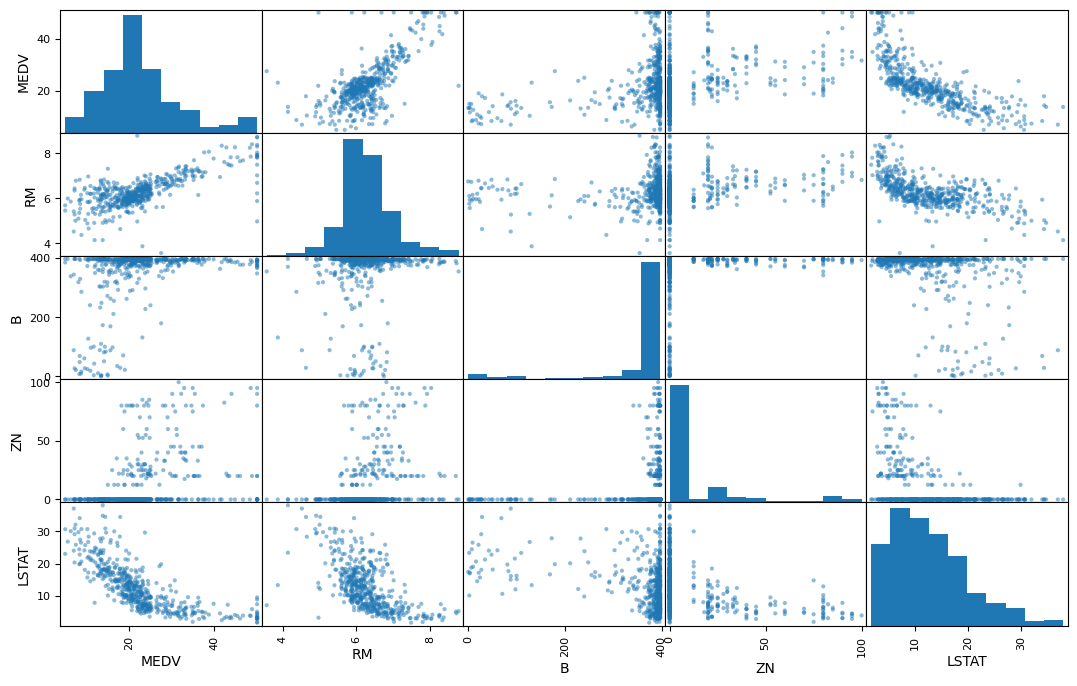

In [541]:
from pandas.plotting import scatter_matrix

#Attributes only shows some of the strongest correlations and also the lowest correlation
attributes = ['MEDV', 'RM', 'B', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize= (13,8))

<Axes: xlabel='RM', ylabel='MEDV'>

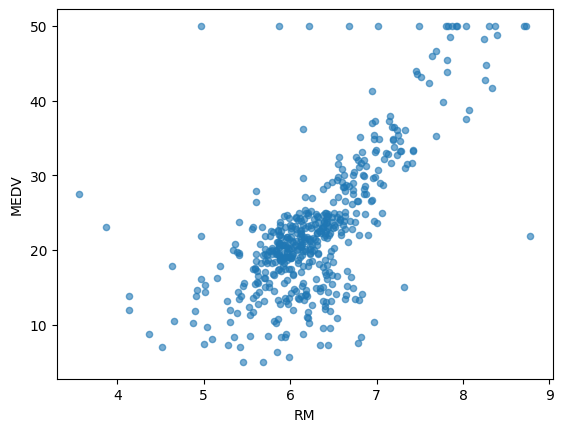

In [542]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.6)

## Missing Attributes
To take care of missing attributes, we have three options that I'm aware of:
1. Get rid of the missing data points
2. Get rid of the whole attribute () 
3. Set the value to some value(0, mean or median)

In [543]:
#1. Get rid of missing attributes
# a=housing.dropna(subset=['RM'])
# a.shape


In [544]:
#2. Drop attribute entirely
# housing.drop('RM', axis = 1)

We will fill the missing `RM`'s values with the median.

Running housing.info() confirms that all attributes now have 506 values.

In [545]:
#3. Set the value to median
median = housing['RM'].median()
housing['RM'].fillna(median, inplace=True)

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


While we manually added missing `RM` values before, we can ensure that any missing values in our dataset in the future can be handled using `SimpleImputer`

In [546]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

## Scikit-learn Design

Primarily, three types of objects:
1. Estimators - Estimates some parameter based on a dataset. E.g. Imputer
    - It has a fit method and transform method
        - Fit method - Fits the dataset and calculates internal parameters
2. Transformers - Takes input and returns output based on the learnings from fit method. It also has a convenience function called fit_transform() which fits and then transforms
3. Predictors - Algorithms such as LinearRegression model. fit() and predict() are two common functions. It also gives score function which will evaluate the predictions. 

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    - (value-min)/(max-min)
    - Sklearn provides a class called MinMaxScaler for this
2. Standardization
    - (value-mean)/st. deviation
    - Sklearn provides a class called Standard Scaler for this

## Creating a Pipeline

Let's create a simple pipeline for data pre-processing for our test and training groups

In [547]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])


## Train-Test Splitting

Before we begin our testing, let's run out dataset through imputer to ensure no values are missing. (This is an unnecessary step because we manually added the missing values as median using fillna but I wanted to place it here anyways for reference in future projects)

In [548]:
X = imputer.transform(housing)
housing = pd.DataFrame(X, columns=housing.columns)

housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.281125,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.697471,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Now let's split our data into train and test groups. Keep in mind that `CHAS` needs to be evenly split between train and test. It is important to ensure that there are some datapoints in both the train and test group that shows `CHAS`'s value to be 1

In the two code blocks below, I was trying to review how `train_test_split` works (this can be ignored)

In [549]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)                                  # Set random seed to ensure same results each time the code is run
    shuffled = np.random.permutation(len(data))         # Create a shuffled array of indices for the data
    test_set_size = int(len(data) * test_ratio)         # Determine the size of the test set based on the test_ratio parameter
    test_indices = shuffled[:test_set_size]             # Select the first test_set_size indices as test set indices
    train_indices = shuffled[test_set_size:]            # Select the remaining indices as train set indices

    # Return the train and test sets as dataframes using the selected indices
    return data.iloc[train_indices], data.iloc[test_indices]

# Train set will have 80% and test set will have 20% of the values
train_set, test_set = split_train_test(housing,0.2)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")


Rows in train set: 405
Rows in test set: 101


In [550]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")


Rows in train set: 404
Rows in test set: 102


Because `RM` has no missing values now, we can start to split our data into a training group and a test group (keeping in mind that we want `CHAS` to have the value of 1 in both groups).

We will use `StratifiedShuffleSplit` to shuffle the data and split it while ensure `CHAS` will have representation

In [551]:
# Import the necessary function from scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit

# Create an instance of the StratifiedShuffleSplit class
# Here, we are specifying that we want to split the data into 1 train/test split
# The test set will be 20% of the total data
# We set the random_state to 42 to ensure that the results are reproducible
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Loop over the indices generated by the StratifiedShuffleSplit instance
# This will create a single train/test split of the data
# The data will be split such that the proportion of samples with CHAS = 1
# is preserved in both the training and test sets
for train_index, test_index in split.split(housing, housing['CHAS']):
    
    # Use the training indices to extract the corresponding rows from the housing data
    strat_train_set = housing.loc[train_index]
    
    # Use the test indices to extract the corresponding rows from the housing data
    strat_test_set = housing.loc[test_index]


In [552]:
print(f"Train data:\n{strat_train_set['CHAS'].value_counts()}")

print(f"Test data:\n{strat_test_set['CHAS'].value_counts()}")

Train data:
0.0    376
1.0     28
Name: CHAS, dtype: int64
Test data:
0.0    95
1.0     7
Name: CHAS, dtype: int64


We will now create a new variables for our training set:
1. `train_data` represents a dataset without the `MEDV` (target value).
2. `train_target` represents only `MEDV` values.

We can now `train_data` through our pipeline to ensure all rows have values

In [553]:
train_data = strat_train_set.drop("MEDV", axis = 1)
train_target = strat_train_set["MEDV"].copy()

By describing `train_data` we can confirm that `MEDV` is not part of our data set. Now we can create a model, give it this dataset and tell it what the target label looks like using a `train_target` variable's values.

In [554]:
train_data_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277738,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.707792,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.208500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [555]:
train_target.describe()

count    404.000000
mean      22.509406
std        9.385531
min        5.000000
25%       16.600000
50%       21.150000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [556]:
train_target.iloc[:10]

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
411    17.2
250    24.4
100    27.5
429     9.5
57     31.6
Name: MEDV, dtype: float64

## Selecting Desired Model

Now that we have our data sets ready, let's play around with a few models to see which one works best. The outputs for each model are saved in `ModelOutputs.txt`

## Linear Regression

Firstly, we will try linear regression. The `model.fit(data, target)` command allows us to train our data

In [557]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

model.fit(train_data, train_target)

LinearRegression()

Here are the predictions for the first 5 rows of train_data, these should be near accurate since the model was trained on them

In [558]:
some_data = train_data.iloc[:5]
some_labels = train_target.iloc[:5]


In [559]:
model.predict(some_data)

array([23.9630108 , 27.22577314, 20.65221677, 25.04896896, 23.76343885])

In [560]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

Below we will test the model with our training set to see how good it is at predicting

In [561]:
test_data_tr = strat_test_set.drop("MEDV", axis = 1)
test_target = strat_test_set["MEDV"].copy()

In [562]:
some_data = test_data_tr.iloc[:5]
some_labels = test_target.iloc[:5]


In [563]:
model.predict(some_data)

array([22.74085547, 17.28376988, 30.06895625, 30.75699959,  8.84735785])

In [564]:
list(some_labels)

[16.5, 10.2, 30.1, 23.0, 14.4]

We have gathered Results for Linear Regression, let's evaluate the results for test data.

The results don't look very good. `Mead Squared Error` is too high for this model to be usable

In [565]:
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(train_data_tr)
mse = mean_squared_error(train_target, train_predictions)
rmse = np.sqrt(mse) 

In [566]:
mse

23.38607650055974

In [567]:
from sklearn.metrics import mean_squared_error
test_predictions = model.predict(test_data)
mse = mean_squared_error(test_target, test_predictions)
rmse = np.sqrt(mse) 

/home/ahmad016/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [568]:
mse

433.78275113425207

In [569]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_data, train_target, scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.21985858, 4.26306995, 5.12624426, 3.81803289, 5.34105899,
       4.31468989, 7.44250902, 5.59221758, 4.16681945, 6.01729168])

In [570]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

print_scores(rmse_scores)

Scores:  [4.21985858 4.26306995 5.12624426 3.81803289 5.34105899 4.31468989
 7.44250902 5.59221758 4.16681945 6.01729168]
Mean:  5.03017923009724
Standard Deviation:  1.057694563632392


## Decision Trees

Next we will try decision trees with the same workflow

In [571]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

model.fit(train_data, train_target)

DecisionTreeRegressor()

In [572]:
some_data = train_data.iloc[:5]
some_labels = train_target.iloc[:5]

In [573]:
model.predict(some_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [574]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [575]:
test_data_tr = pd.DataFrame(X, columns=strat_test_set.columns)
test_data_tr = strat_test_set.drop("MEDV", axis = 1)
test_target = strat_test_set["MEDV"].copy()

test_data = my_pipeline.fit_transform(test_data_tr)



In [576]:
some_data = test_data_tr.iloc[:5]
some_labels = test_target.iloc[:5]
prepared_data = my_pipeline.transform(some_data)


In [577]:
model.predict(prepared_data)

/home/ahmad016/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([50., 50., 50., 50., 50.])

In [578]:
list(some_labels)

[16.5, 10.2, 30.1, 23.0, 14.4]

We have gathered Results for Decisions Trees, let's evaluate the results for test data.

In [579]:
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(train_data)
mse = mean_squared_error(train_target, train_predictions)
rmse = np.sqrt(mse) 

It appears that Decision Trees may not be a good choice. We're running into overfitting

In [580]:
mse

0.0

In [581]:
from sklearn.metrics import mean_squared_error
test_predictions = model.predict(test_data_tr)
mse = mean_squared_error(test_target, test_predictions)
rmse = np.sqrt(mse) 

In [582]:
mse

18.46127450980392

In [583]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_data, train_target, scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.22867678, 5.73680884, 4.7754964 , 4.18880622, 7.00767436,
       3.9852227 , 4.86382051, 3.92163869, 3.50406906, 4.20469975])

In [584]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

print_scores(rmse_scores)

Scores:  [4.22867678 5.73680884 4.7754964  4.18880622 7.00767436 3.9852227
 4.86382051 3.92163869 3.50406906 4.20469975]
Mean:  4.6416913322151725
Standard Deviation:  0.9835986023703367


## Random Forest

In [585]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

model.fit(train_data, train_target)

RandomForestRegressor(max_depth=10, random_state=42)

In [586]:
from sklearn.model_selection import train_test_split


feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Create a random forest regressor and fit the model on the training set
model.fit(train_data, train_target)

# Get the feature importances
importances = model.feature_importances_

# Print the feature importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.8f}")

CRIM: 0.04324941
ZN: 0.00117286
INDUS: 0.00658661
CHAS: 0.00089050
NOX: 0.02439436
RM: 0.35914938
AGE: 0.01329558
DIS: 0.06378807
RAD: 0.00380658
TAX: 0.01468728
PTRATIO: 0.01333738
B: 0.01218013
LSTAT: 0.44346187


In [587]:
some_data = train_data.iloc[:10]
some_labels = train_target.iloc[:10]

In [588]:
model.predict(some_data)

array([22.77892987, 25.04762284, 16.47273127, 23.57359658, 23.84439564,
       16.67856537, 24.46423565, 26.35838811, 10.52199697, 31.63061035])

In [589]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0, 17.2, 24.4, 27.5, 9.5, 31.6]

In [590]:
test_data_tr = strat_test_set.drop("MEDV", axis = 1)
test_target = strat_test_set["MEDV"].copy()

In [591]:
some_data = test_data_tr.iloc[:5]
some_labels = test_target.iloc[:5]


In [592]:
model.predict(some_data)

array([24.45217159, 11.66994286, 25.5505241 , 21.77286646, 18.61822908])

In [593]:
list(some_labels)

[16.5, 10.2, 30.1, 23.0, 14.4]

We have gathered Results for Random Forest Model, let's evaluate the results for test data.

Results for mse are not that great on the test data but it may be usable

In [594]:
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(train_data)
mse = mean_squared_error(train_target, train_predictions)
rmse = np.sqrt(mse) 

In [595]:
mse

1.9434180110814374

In [596]:
from sklearn.metrics import mean_squared_error
test_predictions = model.predict(test_data_tr)
mse = mean_squared_error(test_target, test_predictions)
rmse = np.sqrt(mse) 

In [597]:
mse

8.986184431663974

In [598]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, train_data, train_target, scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.81323924, 2.93929602, 4.29834952, 2.60769829, 3.65526552,
       2.60348324, 4.90149491, 3.65491724, 3.70267681, 3.26682739])

In [599]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

print_scores(rmse_scores)

Scores:  [2.81323924 2.93929602 4.29834952 2.60769829 3.65526552 2.60348324
 4.90149491 3.65491724 3.70267681 3.26682739]
Mean:  3.4443248186482807
Standard Deviation:  0.7141484938227142


## Saving the model

We will now save the model (Random Forest) so it can be used in some script (`price-predictor.py` is an example of this however I have used it below as well.)

In [600]:
from joblib import dump
dump(model, 'results.joblib')

['results.joblib']

## Using the model

Here is an example use-case of the model:
`features` will need to be modified with proper values as diplayed below:

- ([[`CRIM`,`ZN`,`INDUS`,`CHAS`,`NOX`,`RM`,`AGE`,`DIS`,`RAD`,`TAX`,`PTRATIO`,`B`,`LSTAT`]])

You can use any row from `data.csv` (excluding `MEDV`) and get predictions (compare with actual `MEDV` value) or plug in your own data of choice (not sure where you'll get that from though). 

Below I have used the values of row 184 from `data.csv` which has the following values:

- features: 0.09103,0,2.46,0,0.488,7.155,92.2,2.7006,3,193,17.8,394.12,4.82

- target (MEDV): `37.9`

Model's prediction: `37.28065128`

That's pretty accurate but since we're testing values from `data.csv`, I'm unsure how well it will work in predicting new values.

In [601]:
from joblib import load

# Load the model from the joblib file
rf = load('results.joblib')

# Create an array of features to be predicted
features = np.array([[0.09103,0,2.46,0,0.488,7.155,92.2,2.7006,3,193,17.8,394.12,4.82]])

# Predict the MEDV value using the loaded model
target_value = rf.predict(features)

# Print the predicted MEDV value
print(target_value)


[37.28065128]


/home/ahmad016/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
